## 15.5 Homework

- Write a code to solve the minimum of 2D function with Monte Carlo method
- Write a code to solve the minimum of 2D function using the gradient decent method with variable step size by following the [wikipedia page](https://en.wikipedia.org/wiki/Gradient_descent)


We are trying to find the minimum of

$$ f(x, y) = \frac{x^2}{2} + \frac{y^2}{4}$$


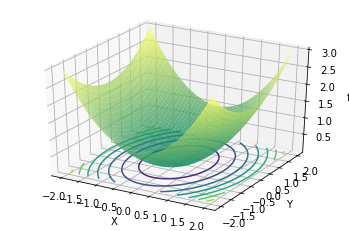

In [1]:
#%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of x

def f2(x,y):
    return 1/2*x**2 + 1/4*y**2

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f2(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()


## 1. monte carlo method

In [4]:
# Monte Carlo Minimize
from random import random

def MCmin(N, f, x_start, x_end, y_start, y_end):
    x_dom = x_end - x_start  # x domain of x
    y_dom = y_end - y_start  # y domain of y
    # start off with a pair of random coordinates
    min_x, min_y = x_dom*random() + x_min, y_dom*random() + y_min
    
    for i in range(N):
        # generate new random pair of coordinates
        x = x_dom*random() + x_min
        y = y_dom*random() + y_min        
        if f(x, y) < f(min_x, min_y):
            min_x, min_y = x, y
    return min_x, min_y, f(min_x, min_y)

In [5]:

import time

timer_start = time.perf_counter() 
x, y, min_val = MCmin(int(1e7), f, -2, 2, -2, 2)
timer_end = time.perf_counter() 
time = timer_end - timer_start

print("Minimum found:")
print("x =", x)
print("y =", y)
print("f(x, y) =", min_val)
print("Time to calculate:", time, "seconds")

Minimum found:
x = 0.0005535717804292517
y = 0.00036290943971728495
f(x, y) = 1.8614667340278424e-07
Time to calculate: 30.2644961 seconds


## 2. gradient decent method

In [65]:
#we need to take the gradient as oppoised to the derivitive
def Gradient(f, coord, d=0.001):
    #coord = the coordinate coord[x,y]
    x, y = coord[0], coord[1]
    
    df_dx = (f(x+d, y)-f(x, y))/d
    df_dy = (f(x, y+d)-f(x, y))/d
    return np.array([df_dx, df_dy])

#Gives a random number
def myRandom(xmin, xmax, ymin, ymax):
    x = xmin + np.random.random()*(xmax-xmin)
    y = ymin + np.random.random()*(ymax-ymin)
    return [x, y]

#the gradient decent method
def Gradient_min(f, start, N=1000, d=0.001):
    
    coord_now = start
    coord_prev = None #previous step
    converged = False
    coord_hist = []
    coord_hist.append(coord_now)
    
    for i in range(N):
        df_now = Gradient(f, coord_now, d)
        #x_next = x_now - derivative(f, x_now)*dx
        
        if coord_prev is None:
            gamma = 0.01
            
        else:
            df_prev = Gradient(f, coord_prev)
            diff = df_now - df_prev
            
            #Barzilain-Borwein method for variable step size
            gamma = np.dot(coord_now - coord_prev, dd) / (np.linalg.norm(dd))**2 
            coord_next = coord_now - gamma*df_now
            
            if f(coord_next[0], coord_next[1]) > f(coord_now[0], coord_now[1]):
                converged = True
                break
            else:
                coord_prev = coord_now
                coord_now = coord_next
                coord_hist.append(coord_now)
            
    return converged, np.array(coord_hist), f(coord_now[0], coord_now[1])

In [66]:
import time

timer_start = time.perf_counter() 
# x, y, min_val = MCmin(int(1e7), f, -2, 2, -2, 2)
converged, coord_hist, fmin = Gradient_min(f, myRandom(-2,2,-2,2))
timer_end = time.perf_counter() 
time = timer_end - timer_start



print("Minimum found:")
print("fmin = ", fmin)
print("Time to calculate:", time, "seconds")

Minimum found:
fmin =  0.019476416398719155
Time to calculate: 0.014616600004956126 seconds
